In [36]:
from sklearn.datasets import make_blobs, load_iris, make_moons, load_wine, make_circles, load_breast_cancer, load_digits
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score,silhouette_samples
from mpl_toolkits.mplot3d import Axes3D

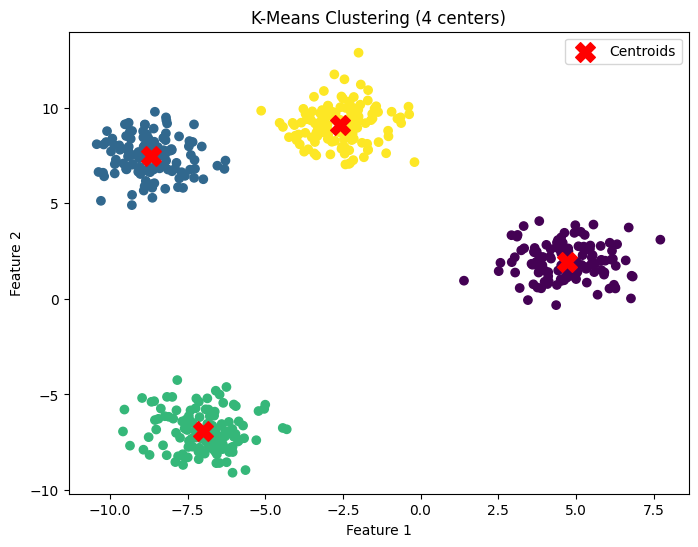

In [2]:
# Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot
# Generate synthetic data with 4 centers
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (4 centers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [4]:
# Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering to group data into 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(X)

# Display the first 10 predicted labels
print(y_agg[:10])

[1 1 1 1 1 1 1 1 1 1]


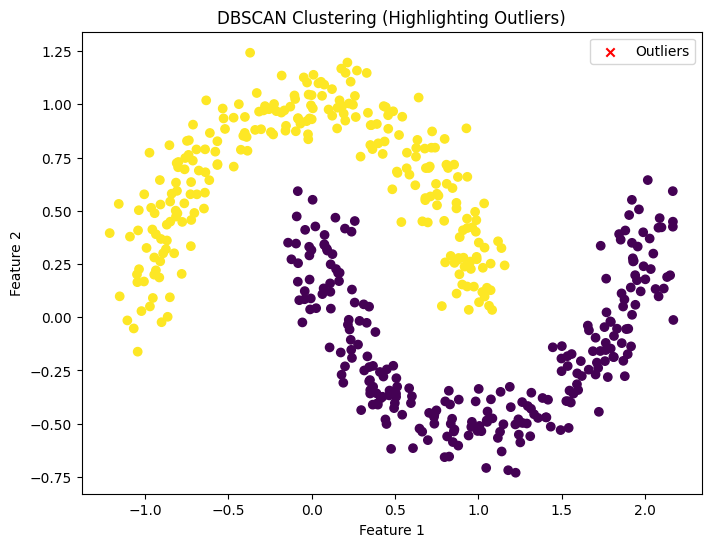

In [6]:
# Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot
# Generate synthetic data using make_moons
X, _ = make_moons(n_samples=500, noise=0.1, random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot the results, highlighting outliers (label -1)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', marker='o')
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], color='red', label='Outliers', marker='x')
plt.title('DBSCAN Clustering (Highlighting Outliers)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [9]:
# Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster
# Load the Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Print the size of each cluster
cluster_sizes = np.bincount(y_kmeans)
print("Size of each cluster:", cluster_sizes)

Size of each cluster: [65 51 62]


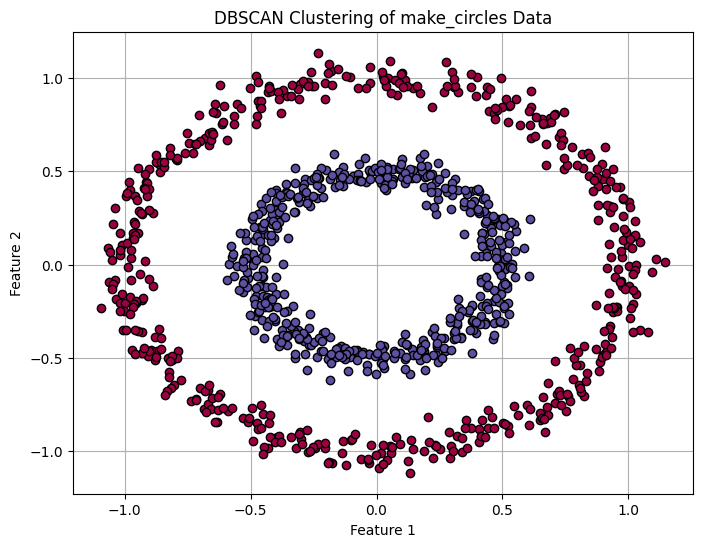

In [11]:
#  Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the resul.
# Generate synthetic data
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the result
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering of make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [13]:
# Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
feature_names = data.feature_names

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Get cluster centroids
centroids = kmeans.cluster_centers_

# Convert centroids to DataFrame for readability
centroids_df = pd.DataFrame(centroids, columns=feature_names)

# Print centroids
print("Cluster Centroids:\n")
print(centroids_df)

Cluster Centroids:

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fractal dimension  
0  

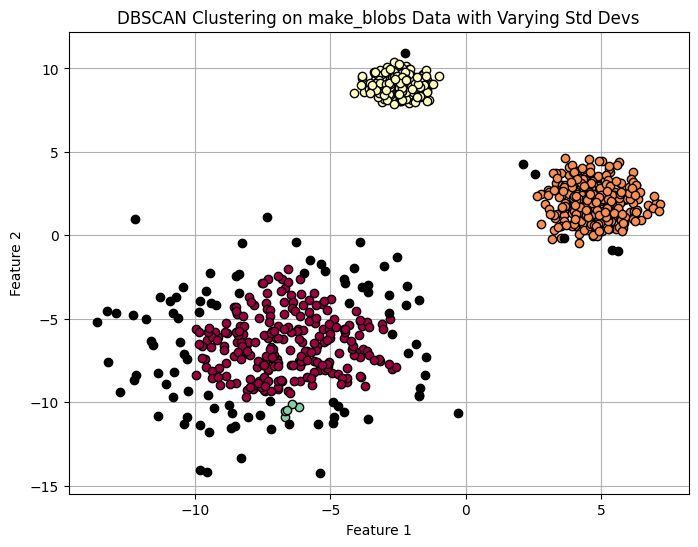

In [14]:
# Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
# Generate synthetic data with varying cluster standard deviations
X, y = make_blobs(n_samples=1000,
                  centers=3,
                  cluster_std=[0.5, 1.0, 2.5],
                  random_state=42)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering on make_blobs Data with Varying Std Devs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

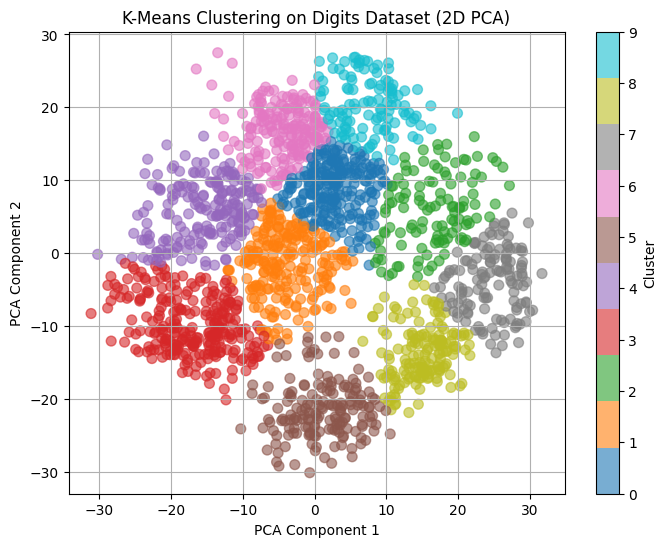

In [16]:
# Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot the clustering results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.6)
plt.title('K-Means Clustering on Digits Dataset (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()

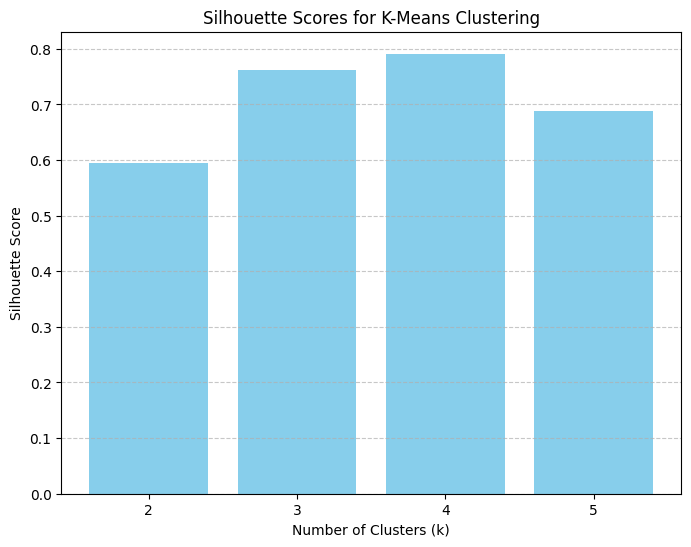

In [18]:
# Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart
# Generate synthetic data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Evaluate silhouette scores for k = 2 to 5
k_values = range(2, 6)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xticks(k_values)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

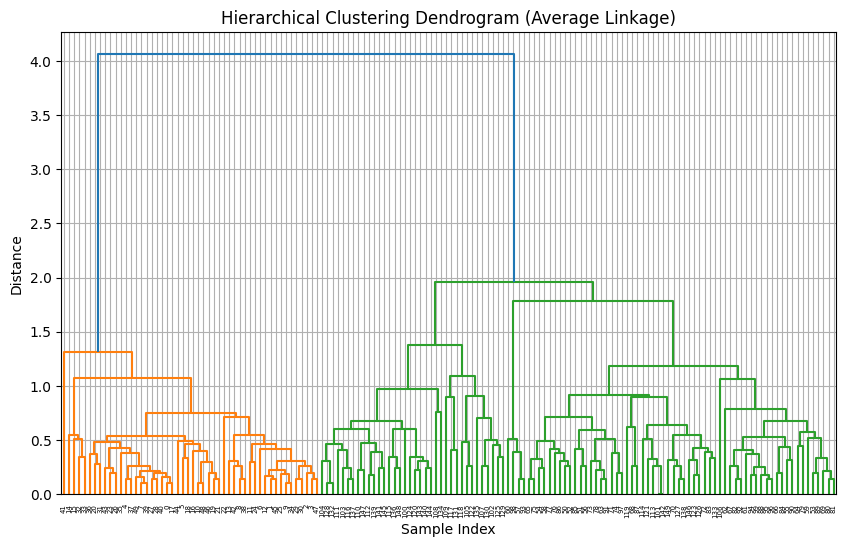

In [20]:
#  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
# Load the Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering using average linkage
linked = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

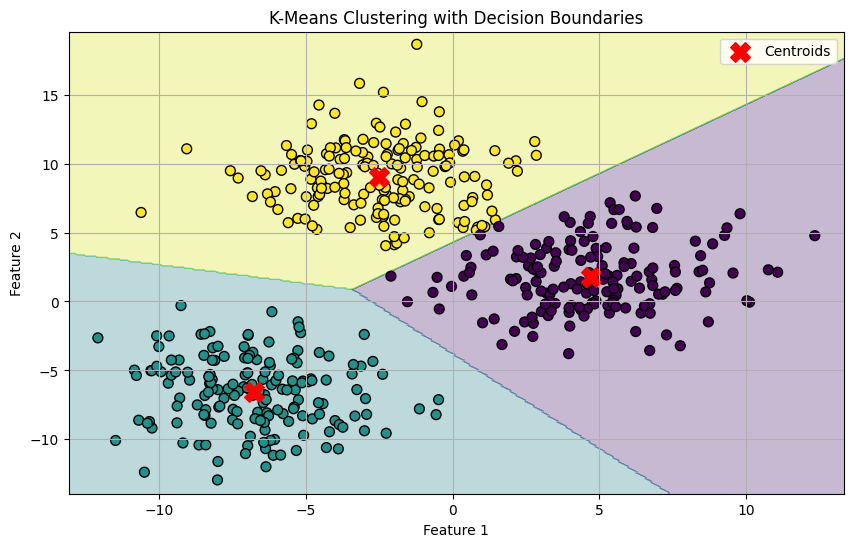

In [21]:
# Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries
# Generate synthetic data with overlapping clusters
X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.5, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Define the mesh grid for decision boundary visualization
h = 0.1  # step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries and cluster centers
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering with Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

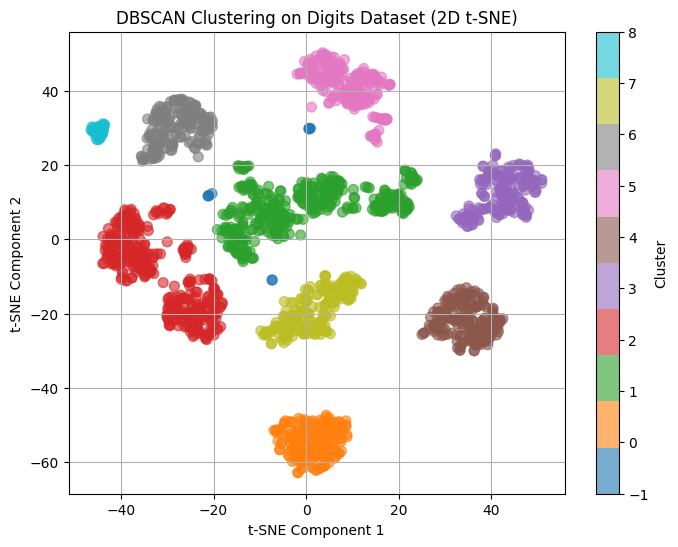

In [23]:
# Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Reduce the dimensionality of the data with t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=10)
labels = dbscan.fit_predict(X_tsne)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=50, alpha=0.6)
plt.title('DBSCAN Clustering on Digits Dataset (2D t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

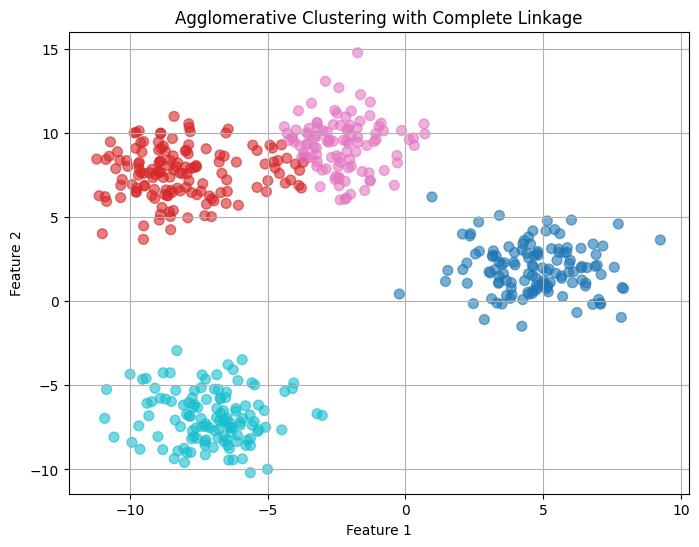

In [24]:
# Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result
# Generate synthetic data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=42)

# Apply Agglomerative Clustering with complete linkage
agg_clust = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg_clust.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, alpha=0.6)
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

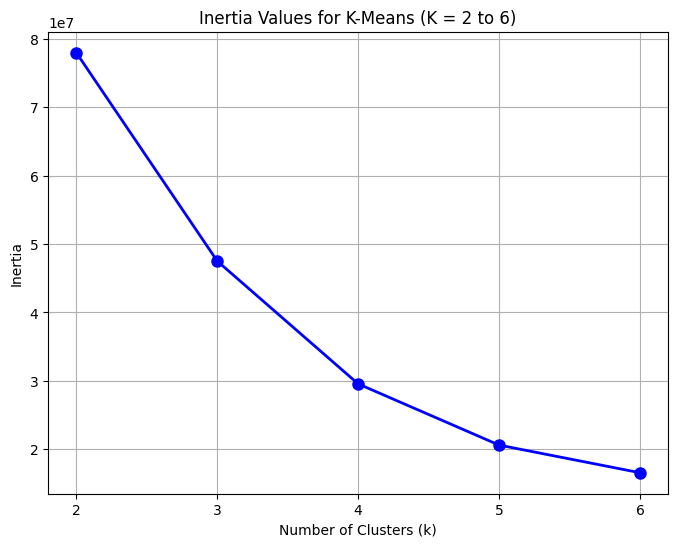

In [25]:
# Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Evaluate inertia for k = 2 to 6
k_values = range(2, 7)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values as a line plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Inertia Values for K-Means (K = 2 to 6)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_values)
plt.show()

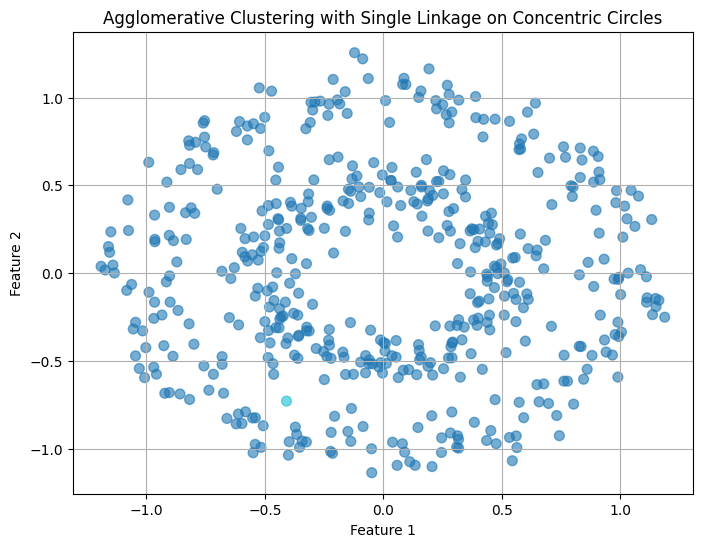

In [26]:
# Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage
# Generate synthetic concentric circles
X, y = make_circles(n_samples=500, factor=0.5, noise=0.1)

# Apply Agglomerative Clustering with single linkage
agg_clust = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_clust.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, alpha=0.6)
plt.title('Agglomerative Clustering with Single Linkage on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

In [27]:
# Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)
# Load the Wine dataset
wine = load_wine()
X = wine.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count the number of clusters excluding noise (-1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters (excluding noise): {num_clusters}")

Number of clusters (excluding noise): 0


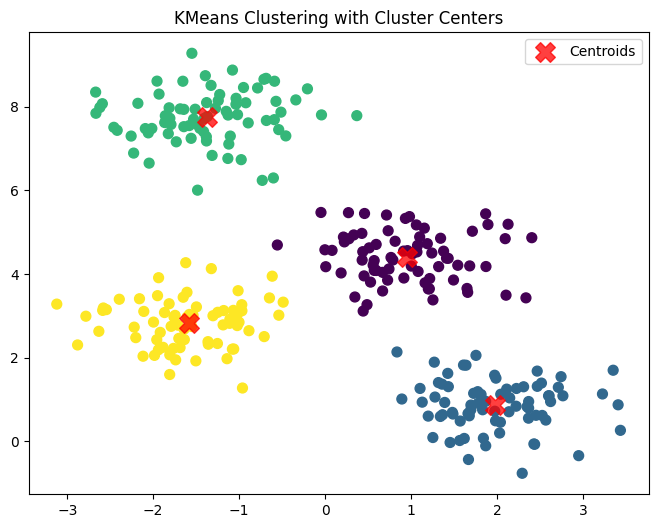

In [28]:
# Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("KMeans Clustering with Cluster Centers")
plt.legend()
plt.show()

In [29]:
# Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise
# Load the Iris dataset
iris = load_iris()
X = iris.data

# Standardize the features for better DBSCAN performance
X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Count noise samples (label == -1)
n_noise = np.sum(dbscan.labels_ == -1)
print(f"Number of noise samples: {n_noise}")

Number of noise samples: 34


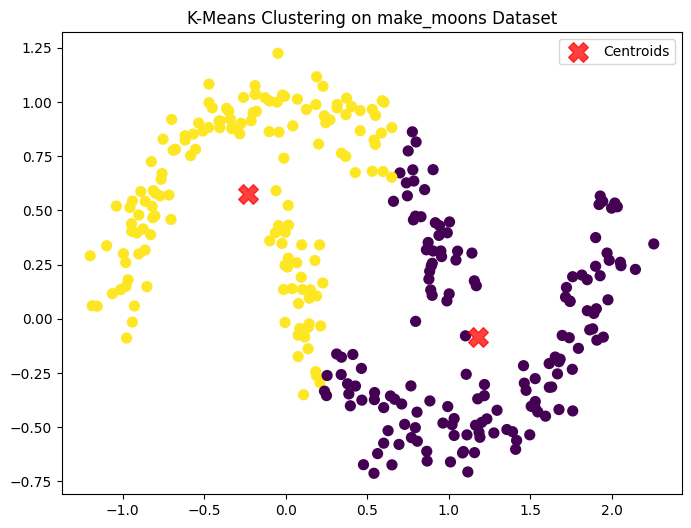

In [30]:
# Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result
# Generate synthetic moon-shaped data
X, y = make_moons(n_samples=300, noise=0.1, random_state=0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering on make_moons Dataset")
plt.legend()
plt.show()

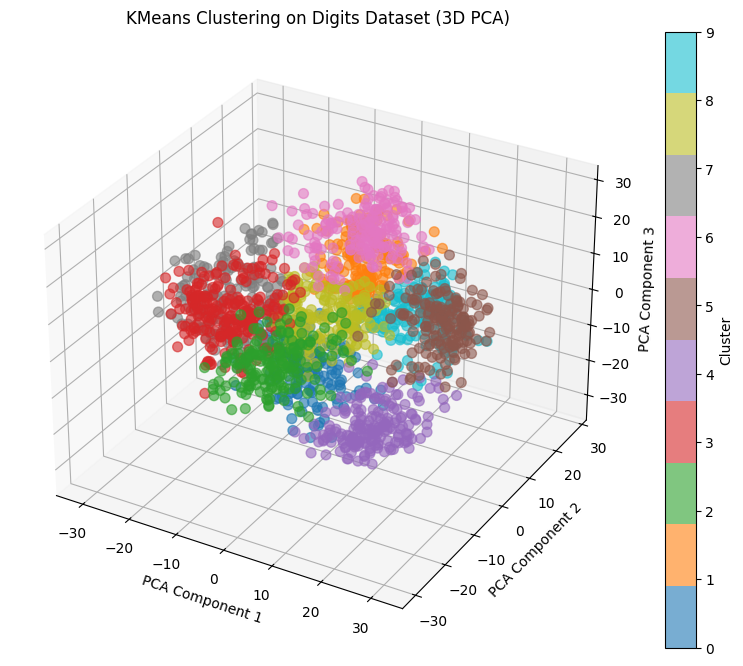

In [32]:
# Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # Actual labels (not used in KMeans, just for reference)

# Reduce to 3 dimensions with PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=0)
labels = kmeans.fit_predict(X_pca)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=50, alpha=0.6)
ax.set_title("KMeans Clustering on Digits Dataset (3D PCA)")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

In [33]:
# Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering
# Generate synthetic data with 5 centers
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X)

# Evaluate with silhouette score
score = silhouette_score(X, labels)

print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.7174


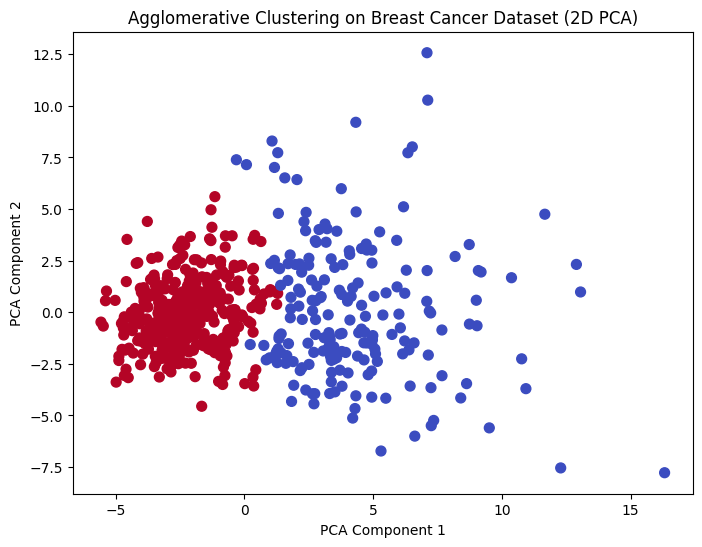

In [34]:
# Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.Visualize in 2D
# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=2)
labels = agg_clust.fit_predict(X_pca)

# Visualize the clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', s=50)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

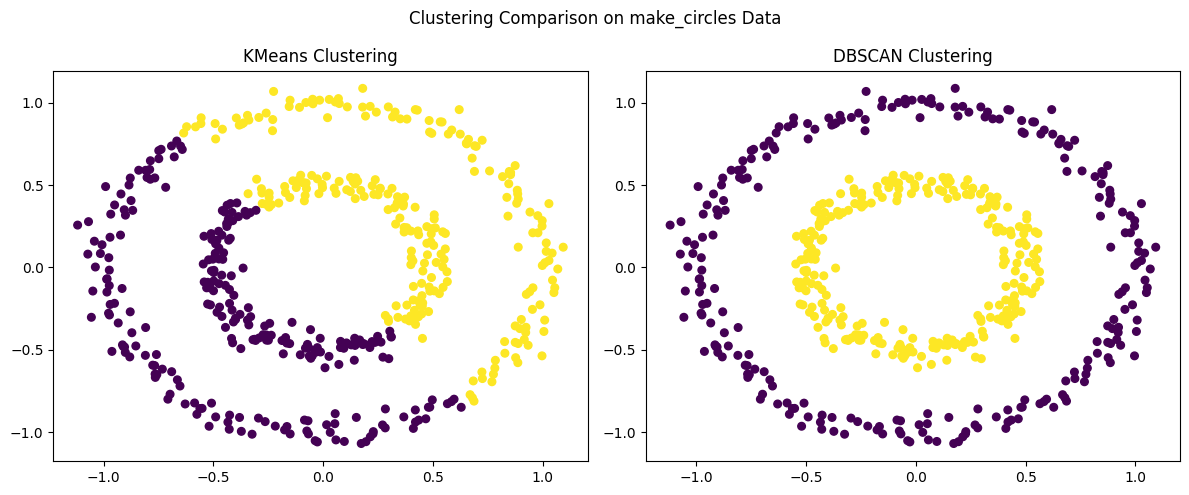

In [35]:
# Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side
# Generate circular synthetic data
X, y = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=0)

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Plot side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KMeans Plot
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30)
axes[0].set_title("KMeans Clustering")

# DBSCAN Plot
axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=30)
axes[1].set_title("DBSCAN Clustering")

plt.suptitle("Clustering Comparison on make_circles Data")
plt.tight_layout()
plt.show()

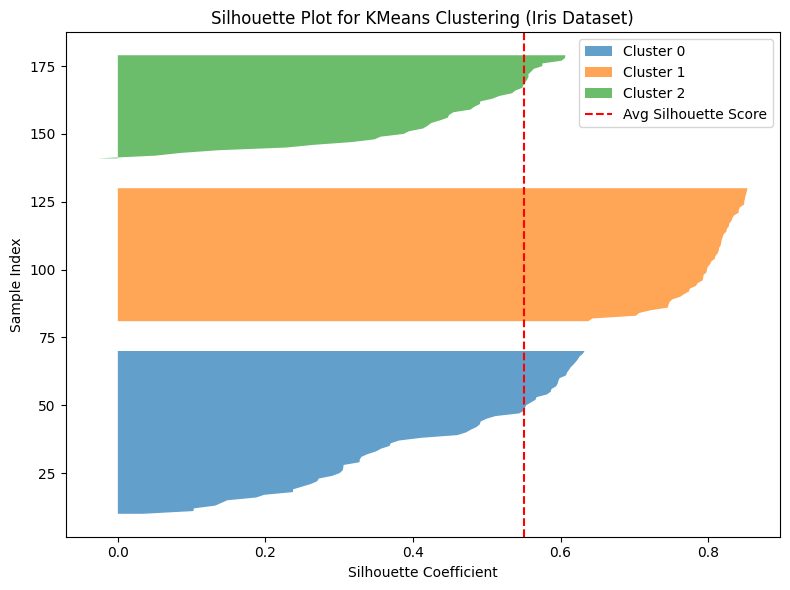

In [37]:
#  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Compute silhouette scores
silhouette_vals = silhouette_samples(X, cluster_labels)
avg_silhouette = silhouette_score(X, cluster_labels)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters):
    cluster_vals = silhouette_vals[cluster_labels == i]
    cluster_vals.sort()
    size_cluster_i = cluster_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, alpha=0.7, label=f'Cluster {i}')
    y_lower = y_upper + 10

plt.axvline(x=avg_silhouette, color='red', linestyle='--', label='Avg Silhouette Score')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Sample Index')
plt.title('Silhouette Plot for KMeans Clustering (Iris Dataset)')
plt.legend()
plt.tight_layout()
plt.show()

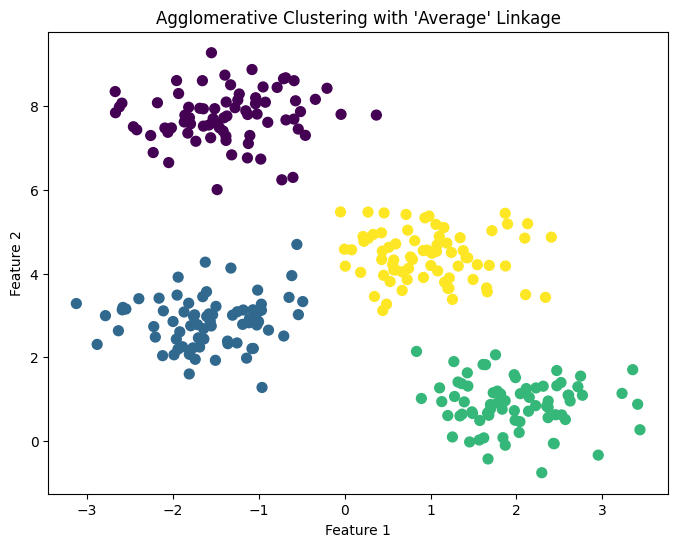

In [38]:
# Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters
# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply Agglomerative Clustering with 'average' linkage
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agg_cluster.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering with 'Average' Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

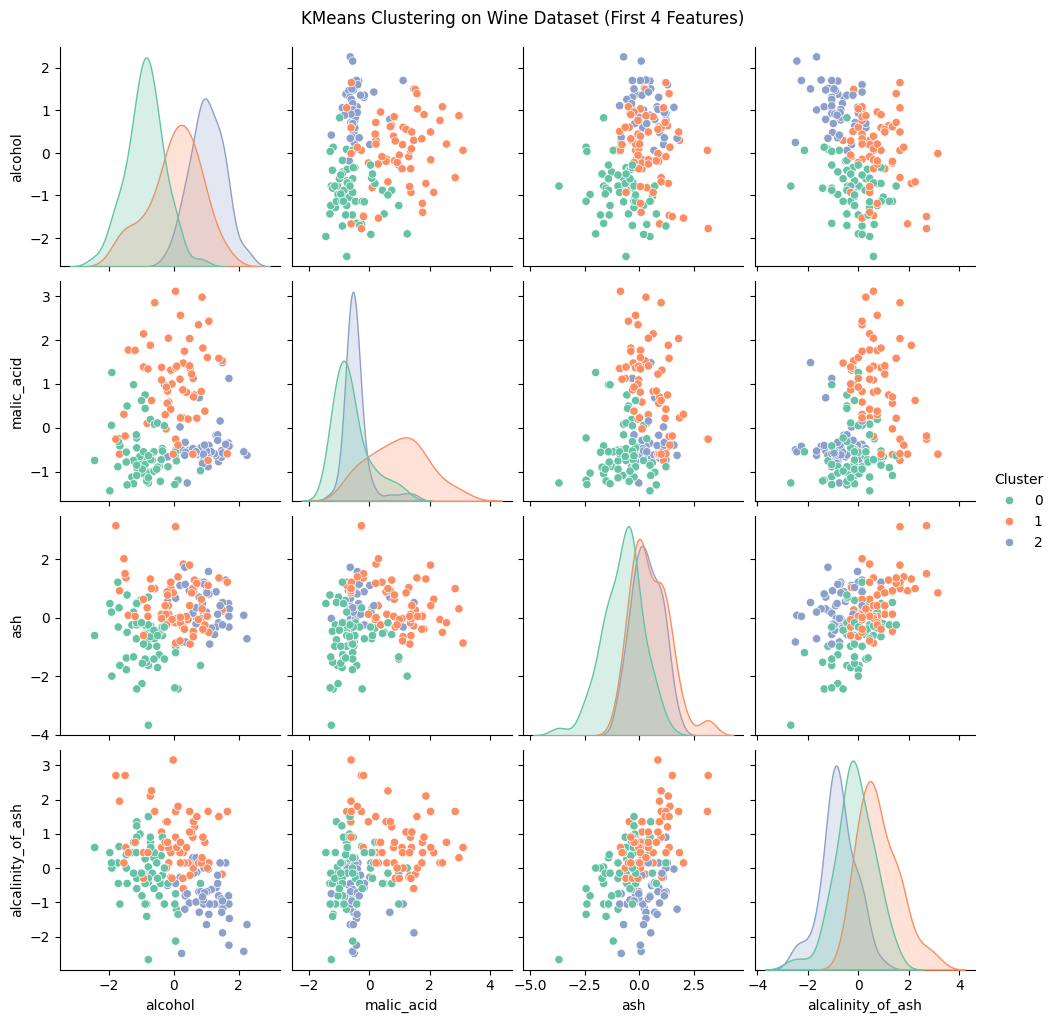

In [40]:
# Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)
import seaborn as sns
# Load the Wine dataset
wine = load_wine()
X = wine.data[:, :4]  # Use only the first 4 features
feature_names = wine.feature_names[:4]

# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=feature_names)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Pairplot visualization
sns.pairplot(df_scaled, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()

In [41]:
# Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count
# Generate noisy blobs
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=0)
X = np.vstack([X, np.random.uniform(low=-10, high=10, size=(50, 2))])  # Add noise points

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Count clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 3
Number of noise points: 58


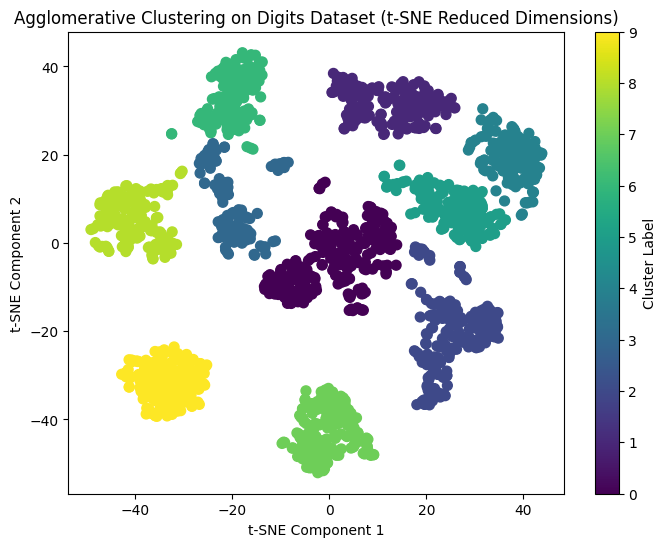

In [42]:
# Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.
# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=10)
labels = agg_clust.fit_predict(X_tsne)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Digits Dataset (t-SNE Reduced Dimensions)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster Label')
plt.show()